In [84]:
import pandas as pd
import numpy as np

filepath = ("/Users/irisvirus/Desktop/Becode/Python/Projects/immo_data_analysis/immo_data_analysis/properties_data_set_19_11_20H00.csv")
df = pd.read_csv(filepath)

In [ ]:
#Cleaning

#Additional data cleaning

df = df[df['price'] >= 40000]

df['buildingState'] = df['buildingState'].replace({
    'AS_NEW': 1,
    'JUST_RENOVATED': 2,
    'GOOD': 3,
    'TO_RESTORE': 4,
    'TO_RENOVATE': 4,
    'TO_BE_DONE_UP':4
})
print(df['buildingState'].nunique())
print(df['buildingState'].unique())

df['province'] = df['province'].replace({'flemish_brabant_extended': 'flemish_brabant', 'hainaut_extended': 'hainaut_province'})
print(df['province'].nunique())
print(df['province'].unique())

df = df.dropna(subset=['livingArea'])
nan_counts = df.isna().counts()

In [ ]:
#How many rows colums
df.shape

(16305, 27)

In [ ]:
df.head(10)

,house_index,url,bedrooms,property_type,property_subtype,locality,postal_code,street,number,box,...,fireplaceCount,buildingState,garden,gardenSurface,pool,landSurface,livingArea,surfaceOfThePlot,typeOfSale,province
0,0,https://www.immoweb.be/en/classified/house/for...,4.0,HOUSE,HOUSE,Woluwe-Saint-Pierre,1150.0,Rue au Bois,85,NaN,...,0.0,TO_RENOVATE,1.0,170.0,0.0,270.0,180.0,270.0,NaN,brussels_capital
1,1,https://www.immoweb.be/en/classified/apartment...,3.0,HOUSE,APARTMENT_BLOCK,Uccle,1180.0,Rue de Verrewinkel,38,NaN,...,0.0,TO_RENOVATE,1.0,100.0,0.0,177.0,195.0,177.0,NaN,brussels_capital
2,2,https://www.immoweb.be/en/classified/villa/for...,10.0,HOUSE,VILLA,Corroy-le-Grand,1325.0,Rue du Warichet,12,NaN,...,0.0,AS_NEW,1.0,3752.0,0.0,3985.0,510.0,3985.0,NaN,walloon_brabant
3,3,https://www.immoweb.be/en/classified/house/for...,3.0,HOUSE,HOUSE,Saint-Nicolas,4420.0,Rue Voie des Vaux,262,NaN,...,0.0,AS_NEW,1.0,492.0,0.0,600.0,141.0,600.0,NaN,liège_province
4,4,https://www.immoweb.be/en/classified/apartment...,3.0,APARTMENT,APARTMENT,Oostende,8400.0,Torhoutsesteenweg,278,301,...,0.0,GOOD,0.0,0.0,0.0,NaN,132.0,NaN,NaN,west_flanders
5,5,https://www.immoweb.be/en/classified/house/for...,3.0,HOUSE,HOUSE,Brakel,9660.0,Kunnenbergstraat,13,NaN,...,0.0,TO_RENOVATE,0.0,0.0,0.0,737.0,147.0,737.0,NaN,east_flanders
6,6,https://www.immoweb.be/en/classified/apartment...,6.0,HOUSE,APARTMENT_BLOCK,Leuven,3000.0,JB Van Monsstraat,43,NaN,...,0.0,GOOD,0.0,0.0,0.0,106.0,167.0,106.0,NaN,flemish_brabant_extended
7,7,https://www.immoweb.be/en/classified/apartment...,3.0,APARTMENT,APARTMENT,Evere,1140.0,Allées du Languedoc,2,NaN,...,0.0,TO_RENOVATE,0.0,0.0,0.0,NaN,116.0,NaN,NaN,brussels_capital
8,8,https://www.immoweb.be/en/classified/apartment...,3.0,APARTMENT,APARTMENT,Ixelles,1050.0,Place Marie-José,6,NaN,...,0.0,GOOD,0.0,0.0,0.0,NaN,140.0,NaN,NaN,brussels_capital
9,9,https://www.immoweb.be/en/classified/house/for...,3.0,HOUSE,HOUSE,JODOIGNE,1370.0,Elst,60,NaN,...,0.0,TO_RENOVATE,1.0,2575.0,0.0,2575.0,150.0,2575.0,NaN,walloon_brabant


In [ ]:
df.set_index("house_index",drop=True, inplace=True )

In [ ]:
df.head()

,url,bedrooms,property_type,property_subtype,locality,postal_code,street,number,box,kitchen,...,fireplaceCount,buildingState,garden,gardenSurface,pool,landSurface,livingArea,surfaceOfThePlot,typeOfSale,province
house_index,,,,,,,,,,,,,,,,,,,,,
0,https://www.immoweb.be/en/classified/house/for...,4.0,HOUSE,HOUSE,Woluwe-Saint-Pierre,1150.0,Rue au Bois,85,NaN,1.0,...,0.0,TO_RENOVATE,1.0,170.0,0.0,270.0,180.0,270.0,NaN,brussels_capital
1,https://www.immoweb.be/en/classified/apartment...,3.0,HOUSE,APARTMENT_BLOCK,Uccle,1180.0,Rue de Verrewinkel,38,NaN,1.0,...,0.0,TO_RENOVATE,1.0,100.0,0.0,177.0,195.0,177.0,NaN,brussels_capital
2,https://www.immoweb.be/en/classified/villa/for...,10.0,HOUSE,VILLA,Corroy-le-Grand,1325.0,Rue du Warichet,12,NaN,1.0,...,0.0,AS_NEW,1.0,3752.0,0.0,3985.0,510.0,3985.0,NaN,walloon_brabant
3,https://www.immoweb.be/en/classified/house/for...,3.0,HOUSE,HOUSE,Saint-Nicolas,4420.0,Rue Voie des Vaux,262,NaN,1.0,...,0.0,AS_NEW,1.0,492.0,0.0,600.0,141.0,600.0,NaN,liège_province
4,https://www.immoweb.be/en/classified/apartment...,3.0,APARTMENT,APARTMENT,Oostende,8400.0,Torhoutsesteenweg,278,301,1.0,...,0.0,GOOD,0.0,0.0,0.0,NaN,132.0,NaN,NaN,west_flanders


Correlations

#Price vs Bedroom correlation

In [166]:
price_bedroom_province = df[["price","bedrooms"]]
bedroom_v_price=((df["price"]).corr(df["bedrooms"]))
bedroom_v_price

0.34975267658412595

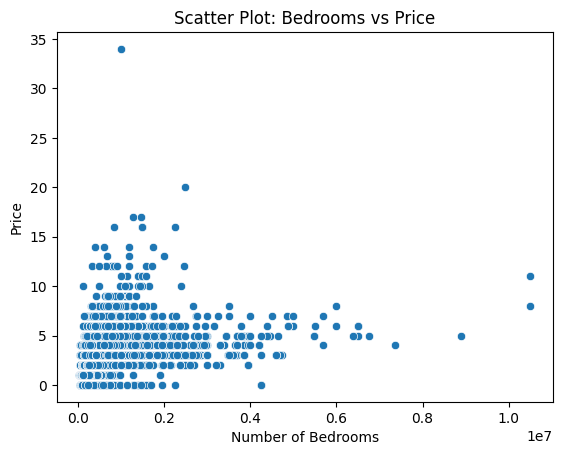

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["bedrooms"])
# Adding titles
plt.title("Scatter Plot: Bedrooms vs Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
# Show the plot
plt.show()


In [ ]:
np.max(df["bedrooms"])
df["bedrooms"].argmax

<bound method IndexOpsMixin.argmax of house_index
0         4.0
1         3.0
2        10.0
3         3.0
4         3.0
         ... 
19973     3.0
19974     4.0
19975     0.0
19976     3.0
19977     3.0
Name: bedrooms, Length: 16305, dtype: float64>

#Price vs LivingArea correlation

In [169]:

livingA_v_house = ((df["price"]).corr(df["livingArea"]))
livingA_v_house

0.4341623255923769

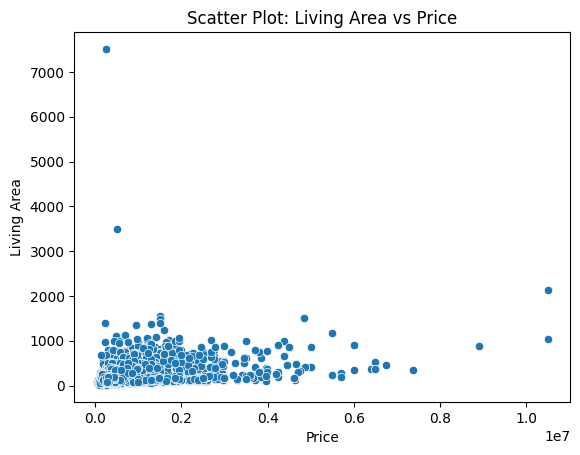

In [171]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["livingArea"])
# Adding titles
plt.title("Scatter Plot: Living Area vs Price")
plt.ylabel("Living Area")
plt.xlabel("Price")
# Show the plot
plt.show()


#Price vs Garden

In [209]:
df.columns

Index(['house_index', 'bedrooms', 'property_type', 'property_subtype',
       'locality', 'postal_code', 'street', 'number', 'box', 'kitchen',
       'facades', 'price', 'furnished', 'terrace', 'terraceSurface',
       'fireplace', 'fireplaceCount', 'buildingState', 'garden',
       'gardenSurface', 'pool', 'landSurface', 'livingArea',
       'surfaceOfThePlot', 'typeOfSale', 'province'],
      dtype='object')

In [210]:
garden_v_price = ((df["price"]).corr(df["gardenSurface"]))
garden_v_price

0.07897596069791632

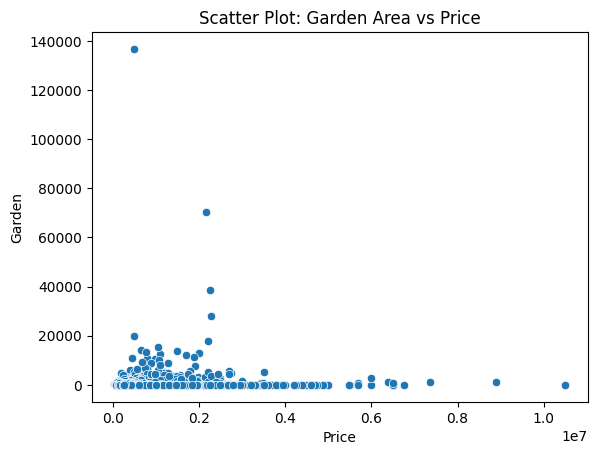

In [212]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["gardenSurface"])
# Adding titles
plt.title("Scatter Plot: Garden Area vs Price")
plt.ylabel("Garden")
plt.xlabel("Price")
# Show the plot
plt.show()


SurfacePlot

In [176]:
surfaceOfThePlot_v_price = ((df["price"]).corr(df["surfaceOfThePlot"]))
surfaceOfThePlot_v_price

0.3478149705438392

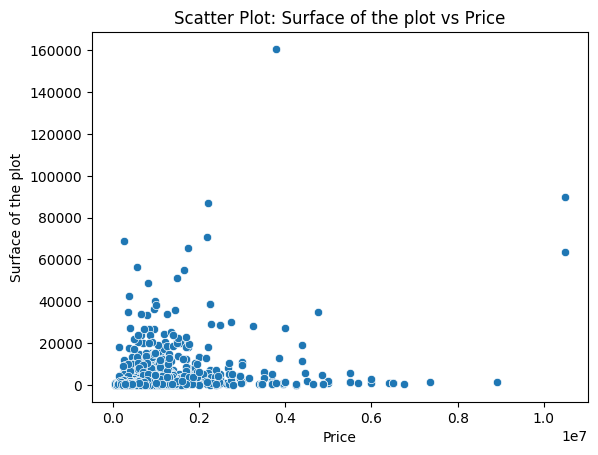

In [199]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["surfaceOfThePlot"])
# Adding titles
plt.title("Scatter Plot: Surface of the plot vs Price")
plt.ylabel("Surface of the plot")
plt.xlabel("Price")
# Show the plot
plt.show()


Price vs Pool Correlation

In [178]:
pool_v_price = ((df["price"]).corr(df["pool"]))
pool_v_price

0.2472084815762243

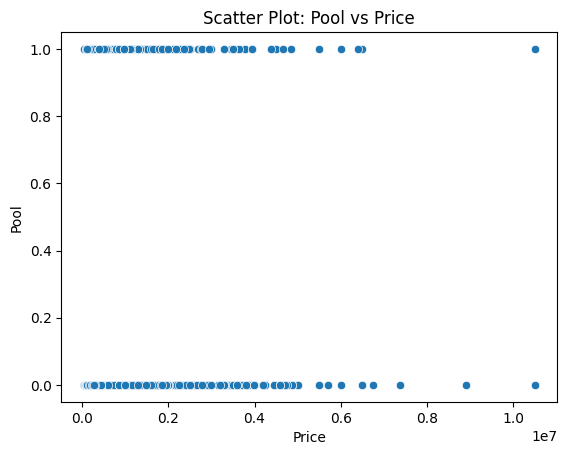

In [200]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["pool"])
# Adding titles
plt.title("Scatter Plot: Pool vs Price")
plt.ylabel("Pool")
plt.xlabel("Price")
# Show the plot
plt.show()


Price vs Fascade Correlation

In [177]:
fascade_v_price = ((df["price"]).corr(df["facades"]))
fascade_v_price

0.20830854500097748

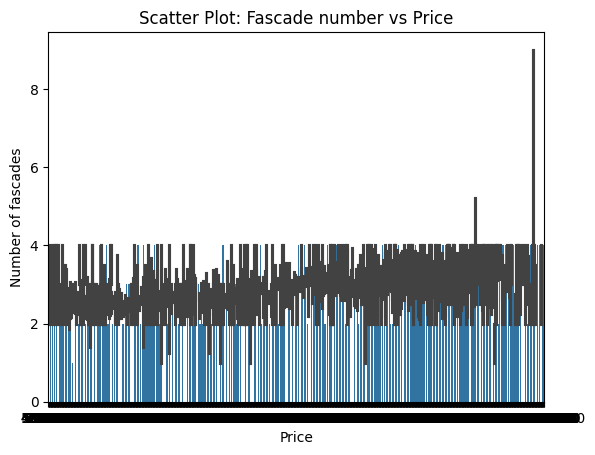

In [207]:
# Scatter plot of price vs bedrooms
sns.barplot(x=df["price"], y=df["facades"])
# Adding titles
plt.title("Scatter Plot: Fascade number vs Price")
plt.ylabel("Number of fascades")
plt.xlabel("Price")
# Show the plot
plt.show()


Price vs Kitchen

In [184]:
kitchen_v_price = ((df["price"]).corr(df["kitchen"]))
kitchen_v_price

-0.03765003213055296

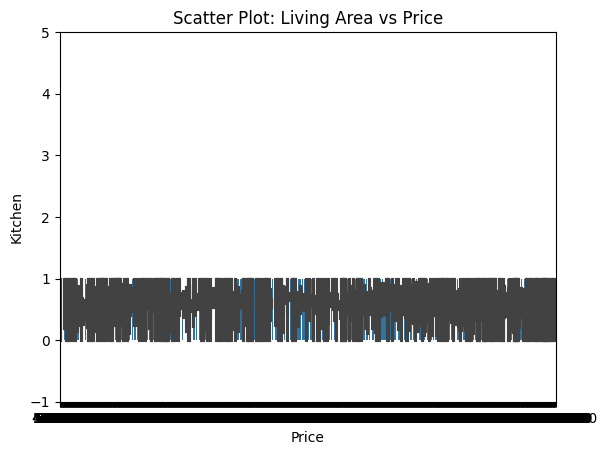

In [208]:
# Scatter plot of price vs terraceSurface
sns.barplot(x=df["price"], y=df["kitchen"])
# Adding titles
plt.title("Scatter Plot: Living Area vs Price")
plt.xlabel("Price")
plt.ylabel("Kitchen")

#define x-axis range

plt.ylim(-1, 5)
# Show the plot
plt.show()


Price vs Terrace Correlation

In [181]:
terrace_v_price = ((df["price"]).corr(df["terrace"]))
terrace_v_price

0.05161197639282704

In [182]:
terraceSurface_v_price = ((df["price"]).corr(df["terraceSurface"]))
terraceSurface_v_price

0.042115813811553236

In [146]:
df_terraceSurface = df
df_terraceSurface["terraceSurface"] =df_terraceSurface["terraceSurface"].fillna(0)

print((df["price"]).corr(df["terraceSurface"]))
print((df_terraceSurface["price"]).corr(df_terraceSurface["terraceSurface"]))

0.042115813811553236
0.042115813811553236


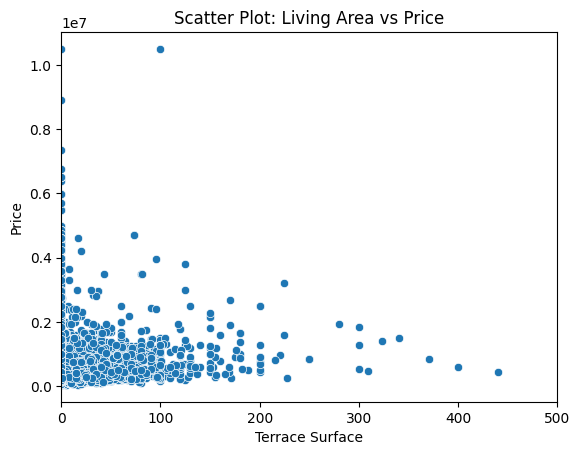

In [195]:
# Scatter plot of price vs terraceSurface
sns.scatterplot(x=df["terraceSurface"], y=df["price"])
# Adding titles
plt.title("Scatter Plot: Living Area vs Price")
plt.xlabel("Terrace Surface")
plt.ylabel("Price")

#define x-axis range
plt.xlim(0, 500)

# Show the plot
plt.show()


Price vs Furnished

In [ ]:
furnished_v_price = ((df["price"]).corr(df["furnished"]))
furnished_v_price

-0.004695286241103416


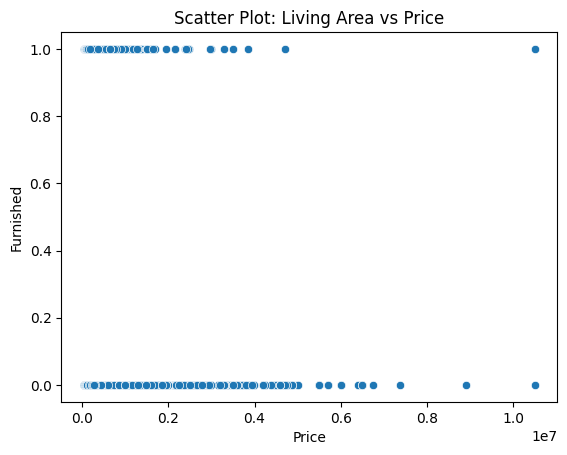

In [196]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["furnished"])
# Adding titles
plt.title("Scatter Plot: Living Area vs Price")
plt.ylabel("Furnished")
plt.xlabel("Price")
# Show the plot
plt.show()


In [ ]:
Price vs Fireplace

In [215]:
fireplace_v_price = ((df["price"]).corr(df["fireplaceCount"]))
fireplace_v_price

0.0031183397088374427

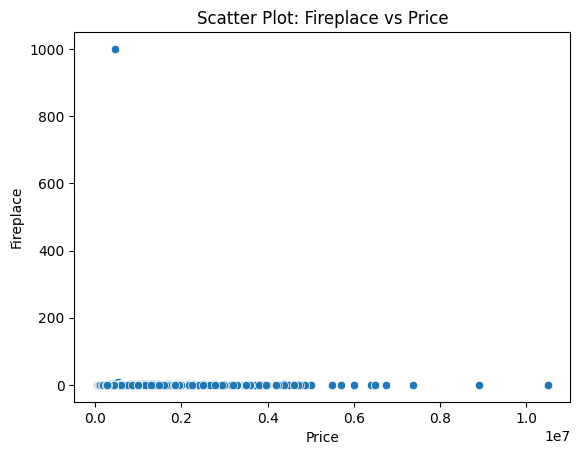

In [197]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["fireplaceCount"])
# Adding titles
plt.title("Scatter Plot: Fireplace vs Price")
plt.ylabel("Fireplace")
plt.xlabel("Price")
# Show the plot
plt.show()


Correlation Data

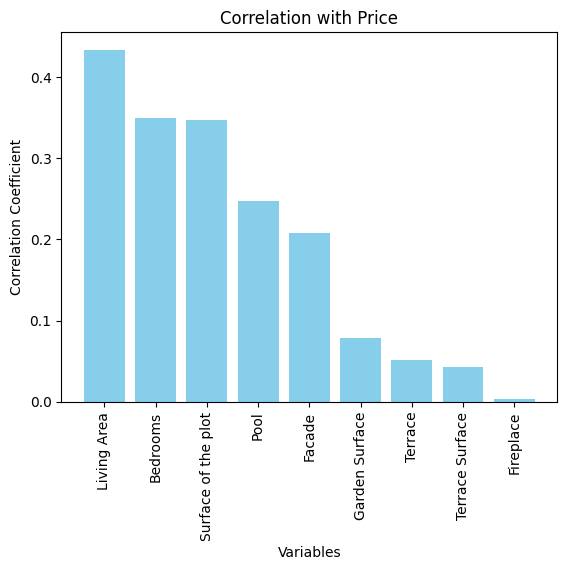

In [221]:
correlation_subset = {
    "Bedrooms": bedroom_v_price,
    "Living Area" : livingA_v_house,
    "Surface of the plot" : surfaceOfThePlot_v_price,
    "Pool": pool_v_price,
    "Facade": fascade_v_price,
    "Terrace Surface": terraceSurface_v_price,
    "Terrace": terrace_v_price,
    "Fireplace": fireplace_v_price,
    "Garden Surface" : garden_v_price}

# Sorting Dictionary Values
sorted_correlation_subset = dict(sorted(correlation_subset.items(), key=lambda item: item[1], reverse=True))


# Creating the bar plot
plt.bar(sorted_correlation_subset.keys(), sorted_correlation_subset.values(), color='skyblue')

#Rotating X-axis titles
plt.xticks(rotation=90)
# Adding labels and title
plt.title("Correlation with Price")
plt.xlabel("Variables")
plt.ylabel("Correlation Coefficient")

# Show the plot
plt.show()

Province_Value Count

In [89]:
df["province"].value_counts().sort_values(ascending = False)

province
west_flanders          3400
antwerp_province       2816
east_flanders          2727
brussels_capital       1686
liège_province          974
limburg_province        464
luxembourg_province     433
walloon_brabant         360
namur_province          220
Name: count, dtype: int64

In [ ]:
df["buildingState"].unique()

array(['TO_RENOVATE', 'AS_NEW', 'GOOD', 'JUST_RENOVATED', 'TO_BE_DONE_UP',
       nan, 'TO_RESTORE'], dtype=object)

In [ ]:
df = df[df["price"] >= 40000]

In [ ]:
def building_state_numerical():
   if df["buildingState"] == "AS_NEW":
      return df["buildingState"] == 1
   elif df["buildingState"] == "JUST_RENOVATED":
      return df["buildingState"] == 2
   elif df["buildingState"] == "GOOD":
      return df["buildingState"] == 3
   elif df["buildingState"] == "TO_RENOVATE" or "TO_RESTORE" or "TO_BE_DONE_UP":
      return df["buildingState"] == 4
      


df["buildingState"] = df["buildingState"].apply(building_state_numerical)

In [ ]:
filtered_df = df[df["buildingState"] == "TO_RENOVATE"]

# Count unique values in the column (or another column if needed)
unique_count = filtered_df["buildingState"].nunique()
unique_count

1

In [ ]:
df_filtered = df.loc[df["buildingState"] == "TO_RESTORE", ["price", "province"]]
print(df_filtered)

In [ ]:
df.livingArea.isna().value_counts()

livingArea
False    15372
True       933
Name: count, dtype: int64

Provincial value count

<Axes: title={'center': 'Absolute frequency distribution of Regional indicator'}, xlabel='province'>

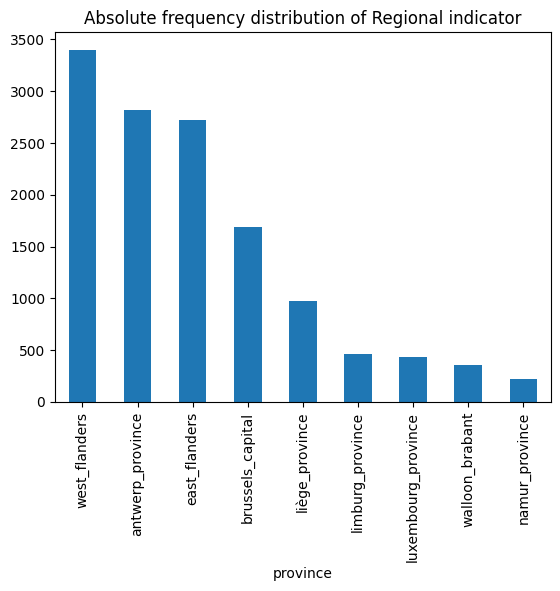

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

df["province"].value_counts().sort_values(ascending = False).plot(kind='bar', title='Absolute frequency distribution of Regional indicator')

<Axes: title={'center': 'Frequency distribution of dataset by median average'}, xlabel='province'>

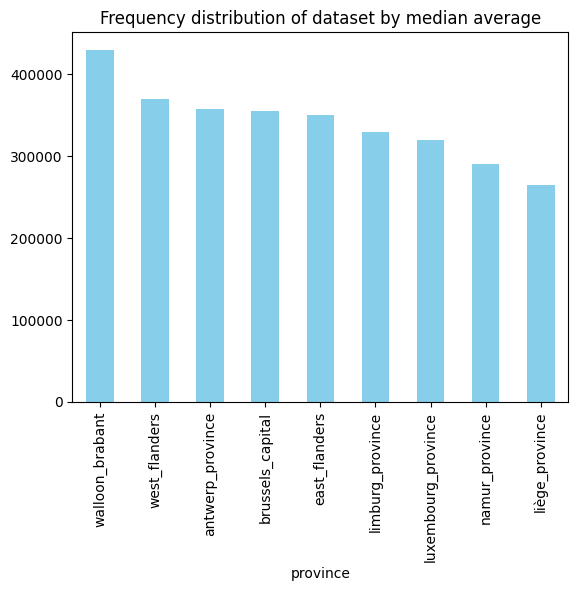

In [116]:
province_median = df.groupby("province")["price"].median()
province_median.sort_values(ascending=False).plot(kind="bar", title = "Frequency distribution of dataset by median average", color="skyblue")

In [108]:
province_median.quantile()

350000.0

TODO

Region on the price